In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv",usecols=[0,1,2])

In [3]:
data

,1,14.23,1.71
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


In [4]:
# df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
# df.columns=['Class label', 'Alcohol', 'Malic acid']
data.columns=['Class label','Alchol','Malic acid']


In [5]:
data

,Class label,Alchol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Alchol', ylabel='Density'>

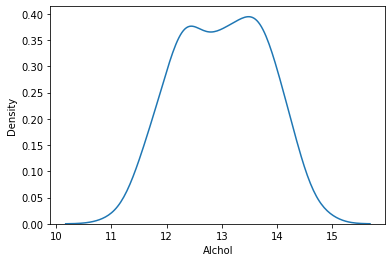

In [7]:
sns.kdeplot(data['Alchol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

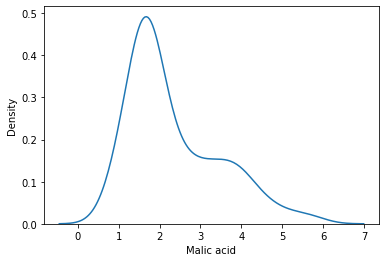

In [8]:
sns.kdeplot(data['Malic acid'])

In [9]:
# color_dict={1:'red',3:'green',2:'blue'}
# sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)


In [10]:
color_dict={1:"red",2:"green",3:"blue"}

c:\users\hira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alchol', ylabel='Malic acid'>

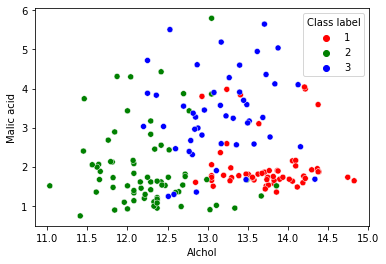

In [11]:
sns.scatterplot(data['Alchol'],data['Malic acid'],hue=data['Class label'],palette=color_dict)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('Class label',axis=1),data['Class label'],test_size=0.3,random_state=0)

In [14]:
X_train.shape

(123, 2)

# normalization min and max scaller

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(X_train)

# # transform train and test sets
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [21]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [22]:
X_train_scaled

,Alchol,Malic acid
0,0.489247,0.144603
1,0.155914,0.093686
2,0.602151,0.690428
3,0.572581,0.545825
4,0.661290,0.156823
...,...,...
118,0.397849,0.171079
119,0.620968,0.010183
120,0.467742,0.517312
121,0.825269,0.230143


In [24]:
import numpy as np

In [27]:
np.round(X_train.describe(),1)

,Alchol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [28]:
np.round(X_train_scaled.describe(),1)

,Alchol,Malic acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


# data after scaling

In [29]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
# ax1.set_title("Before Scaling")
# ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
# ax2.set_title("After Scaling")
# plt.show()

In [30]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'After scaling')

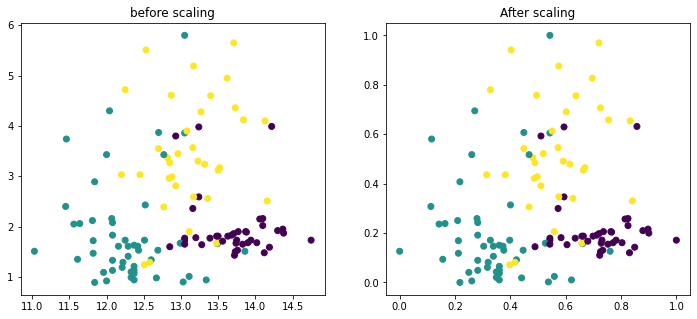

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alchol'],X_train['Malic acid'],c=y_train)
ax1.set_title("before scaling")


ax2.scatter(X_train_scaled['Alchol'],X_train_scaled['Malic acid'],c=y_train)

ax2.set_title("After scaling")

In [34]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# # before scaling
# ax1.set_title('Before Scaling')
# sns.kdeplot(X_train['Alcohol'], ax=ax1)
# sns.kdeplot(X_train['Malic acid'], ax=ax1)

# # after scaling
# ax2.set_title('After Standard Scaling')
# sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
# sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
# plt.show()

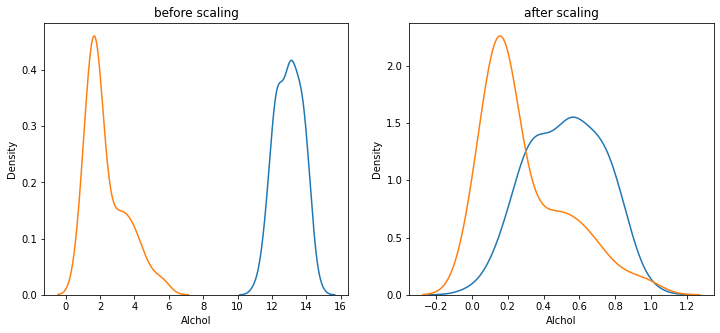

In [36]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("before scaling")
sns.kdeplot(X_train['Alchol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)




ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled['Alchol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

In [37]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# # before scaling
# ax1.set_title('Alcohol Distribution Before Scaling')
# sns.kdeplot(X_train['Alcohol'], ax=ax1)

# # after scaling
# ax2.set_title('Alcohol Distribution After Standard Scaling')
# sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
# plt.show()


<AxesSubplot:title={'center':'Alchol distribution before scaling'}, xlabel='Alchol', ylabel='Density'>

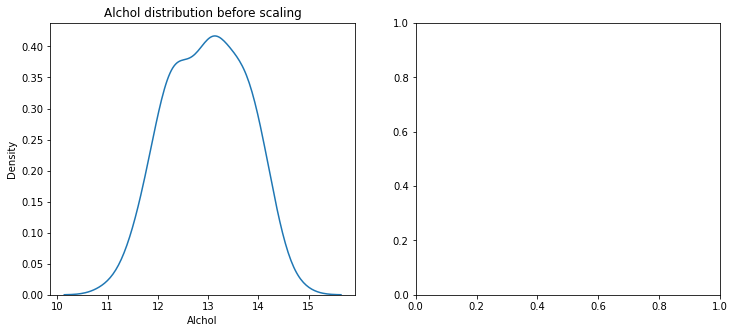

In [38]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Alchol distribution before scaling")
sns.kdeplot(X_train['Alchol'],ax=ax1)


<AxesSubplot:xlabel='Alchol', ylabel='Density'>

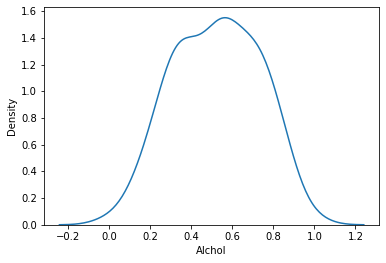

In [39]:
ax2.set_title("After scaling distribution")
sns.kdeplot(X_train_scaled['Alchol'])
